In [2]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
np.set_printoptions(precision=4, suppress=True)


Градиентный спуск для y = x²
Старт: x = 2.0

Команды:
  step()  - шаг
  reset() - сброс

Чтобы изменить стартовую точку, переопредели x_start и вызови reset()


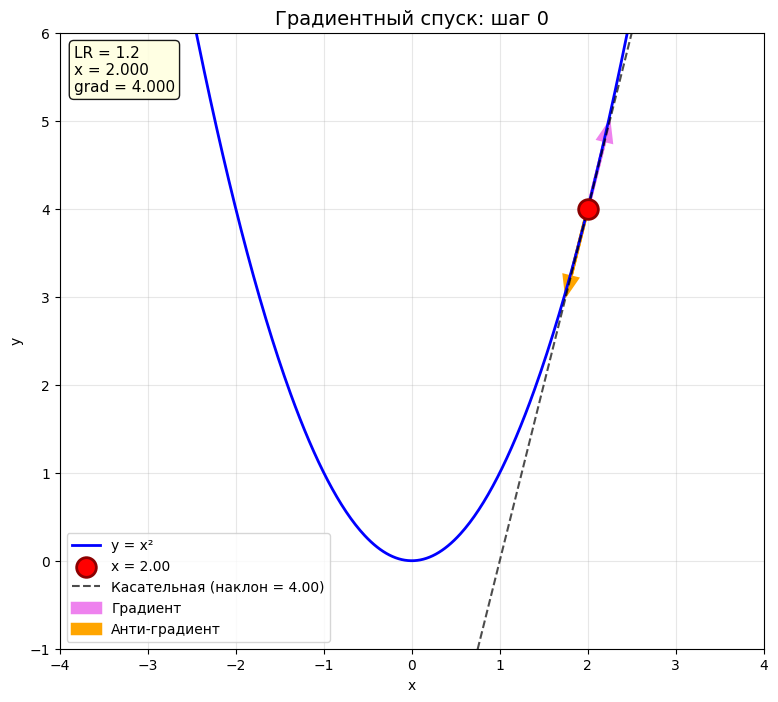

In [30]:
import numpy as np

def f(x):
    return x**2

def df(x):
    return 2*x

# Параметры
learning_rate = 1.2
x_start = 2.0  # можно поменять на любое значение

# Состояние
x_current = x_start
y_current = f(x_current)
step_count = 0
x_history = [x_current]
y_history = [y_current]

x_plot = np.linspace(-abs(x_start) - 1.5, abs(x_start) + 1.5, 400)
y_plot = f(x_plot)

def plot_current_state():
    plt.figure(figsize=(12, 8))
    
    # Функция
    plt.plot(x_plot, y_plot, 'b-', label='y = x²', linewidth=2)
    
    # Точки истории
    if len(x_history) > 1:
        plt.scatter(x_history[:-1], y_history[:-1], 
                   color='gray', s=80, alpha=0.5, label='Прошлые шаги')
    
    # Текущая точка
    plt.scatter(x_current, y_current, color='red', s=200, 
               edgecolors='darkred', linewidth=2, zorder=5,
               label=f'x = {x_current:.2f}')
    
    # Стрелки движения
    for i in range(len(x_history)-1):
        plt.annotate('', xy=(x_history[i+1], y_history[i+1]), 
                    xytext=(x_history[i], y_history[i]),
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
    
    # Касательная
    grad = df(x_current)
    x_tangent = np.linspace(x_current - 1.5, x_current + 1.5, 100)
    y_tangent = grad * (x_tangent - x_current) + y_current
    plt.plot(x_tangent, y_tangent, 'black', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Касательная (наклон = {grad:.2f})')
    
    # Векторы
    length = 0.8
    if abs(grad) > 0.01:
        dx = length / np.sqrt(1 + grad**2)
        dy = grad * dx
        
        # Градиент - всегда вверх по касательной
        if dy > 0:
            plt.arrow(x_current, y_current, dx, dy,
                     head_width=0.15, head_length=0.2, fc='violet', ec='violet', 
                     linewidth=2.5, label='Градиент')
            plt.arrow(x_current, y_current, -dx, -dy,
                     head_width=0.15, head_length=0.2, fc='orange', ec='orange',
                     linewidth=2.5, label='Анти-градиент')
        else:
            plt.arrow(x_current, y_current, -dx, -dy,
                     head_width=0.15, head_length=0.2, fc='violet', ec='violet', 
                     linewidth=2.5, label='Градиент')
            plt.arrow(x_current, y_current, dx, dy,
                     head_width=0.15, head_length=0.2, fc='orange', ec='orange',
                     linewidth=2.5, label='Анти-градиент')
    
    # Инфо
    plt.text(0.02, 0.98, f'LR = {learning_rate}\nx = {x_current:.3f}\ngrad = {grad:.3f}', 
            transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Градиентный спуск: шаг {step_count}', fontsize=14)
    plt.legend(loc='lower left')
    plt.grid(True, alpha=0.3)
    plt.xlim(-4, 4)
    plt.ylim(-1, 6)
    plt.gca().set_aspect('equal')
    
    plt.show()

def step():
    global x_current, y_current, step_count
    
    gradient = df(x_current)
    x_current = x_current - learning_rate * gradient
    y_current = f(x_current)
    
    x_history.append(x_current)
    y_history.append(y_current)
    step_count += 1
    
    print(f"\n=== ШАГ {step_count} ===")
    print(f"x = {x_current:.4f}")
    print(f"grad = {gradient:.4f}")
    
    plot_current_state()

def reset():
    global x_current, y_current, step_count, x_history, y_history
    
    x_current = x_start
    y_current = f(x_current)
    step_count = 0
    x_history = [x_current]
    y_history = [y_current]
    
    print("\n=== СБРОС ===")
    plot_current_state()

# Старт
print("Градиентный спуск для y = x²")
print(f"Старт: x = {x_current}")
print("\nКоманды:")
print("  step()  - шаг")
print("  reset() - сброс")
print("\nЧтобы изменить стартовую точку, переопредели x_start и вызови reset()")

plot_current_state()


=== ШАГ 1 ===
x = -2.8000
grad = 4.0000


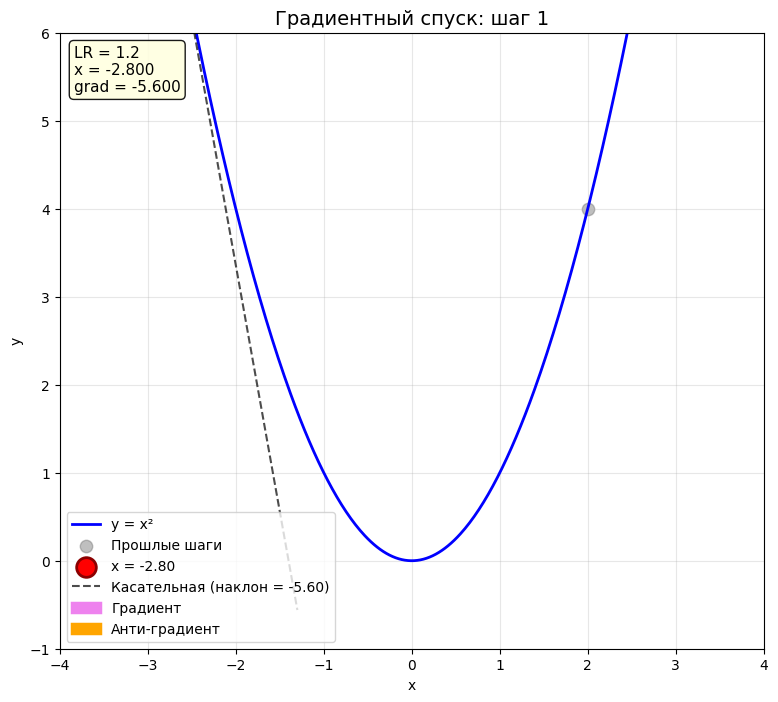

In [31]:
step()


=== ШАГ 2 ===
x = 0.0000
grad = 0.0000


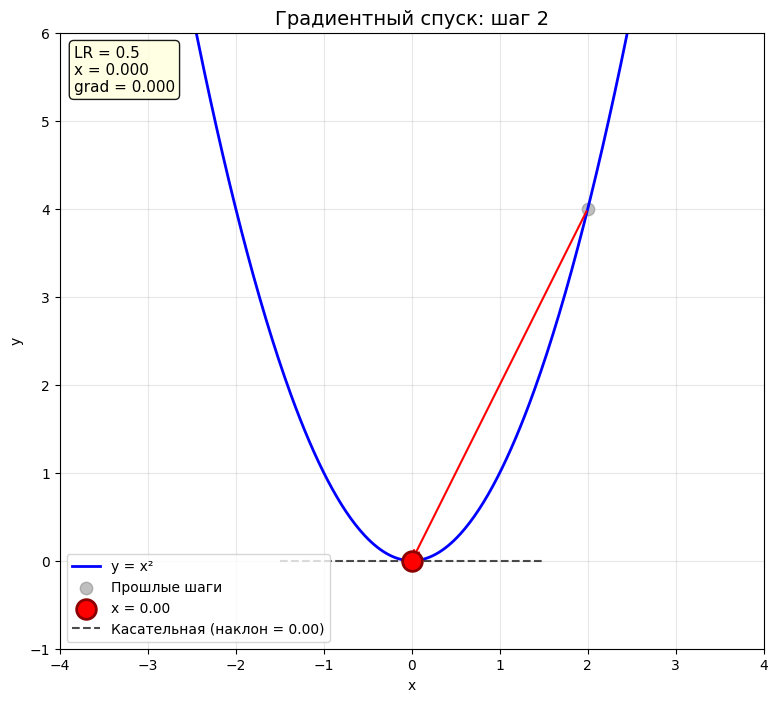

In [29]:
step()


=== ШАГ 3 ===
x = -1.0240
grad = 2.5600


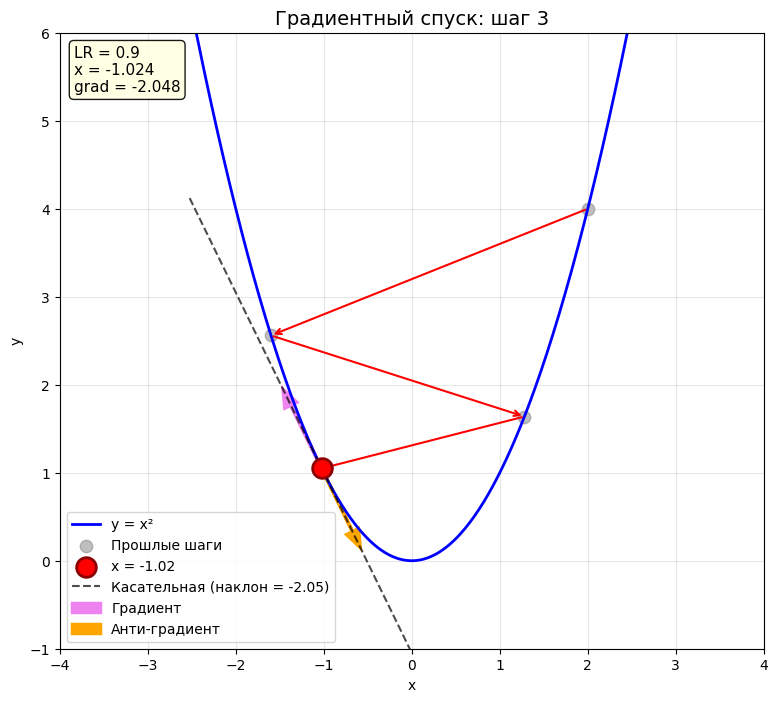

In [26]:
step()


=== ШАГ 4 ===
x = 0.8192
grad = -2.0480


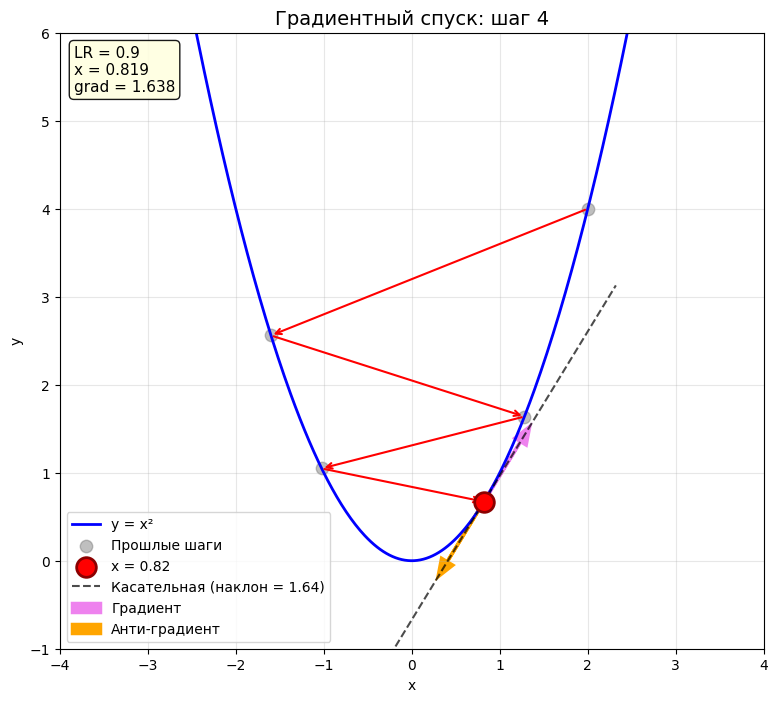

In [14]:
step()


=== ШАГ 5 ===
x = -0.6554
grad = 1.6384


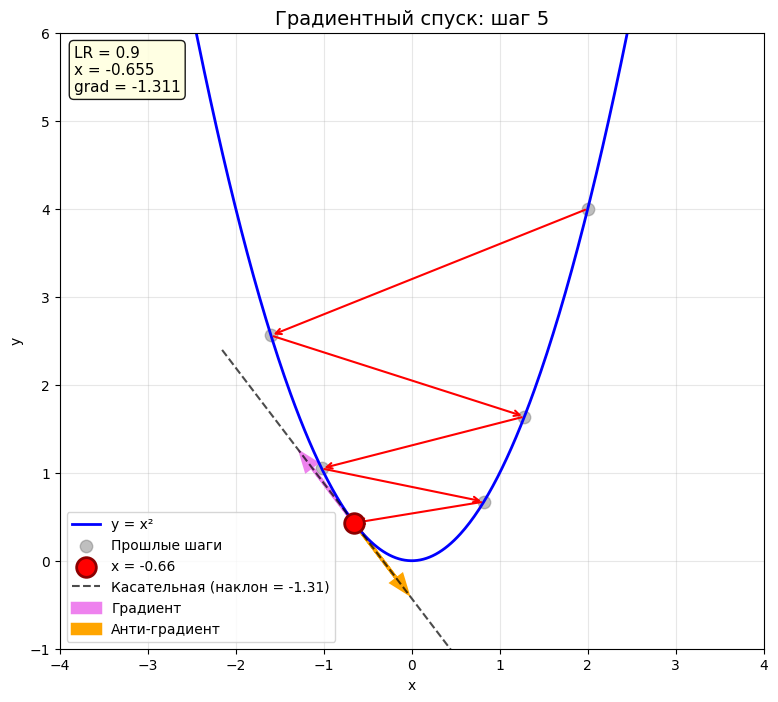

In [15]:
step()

## Функция от двух переменных

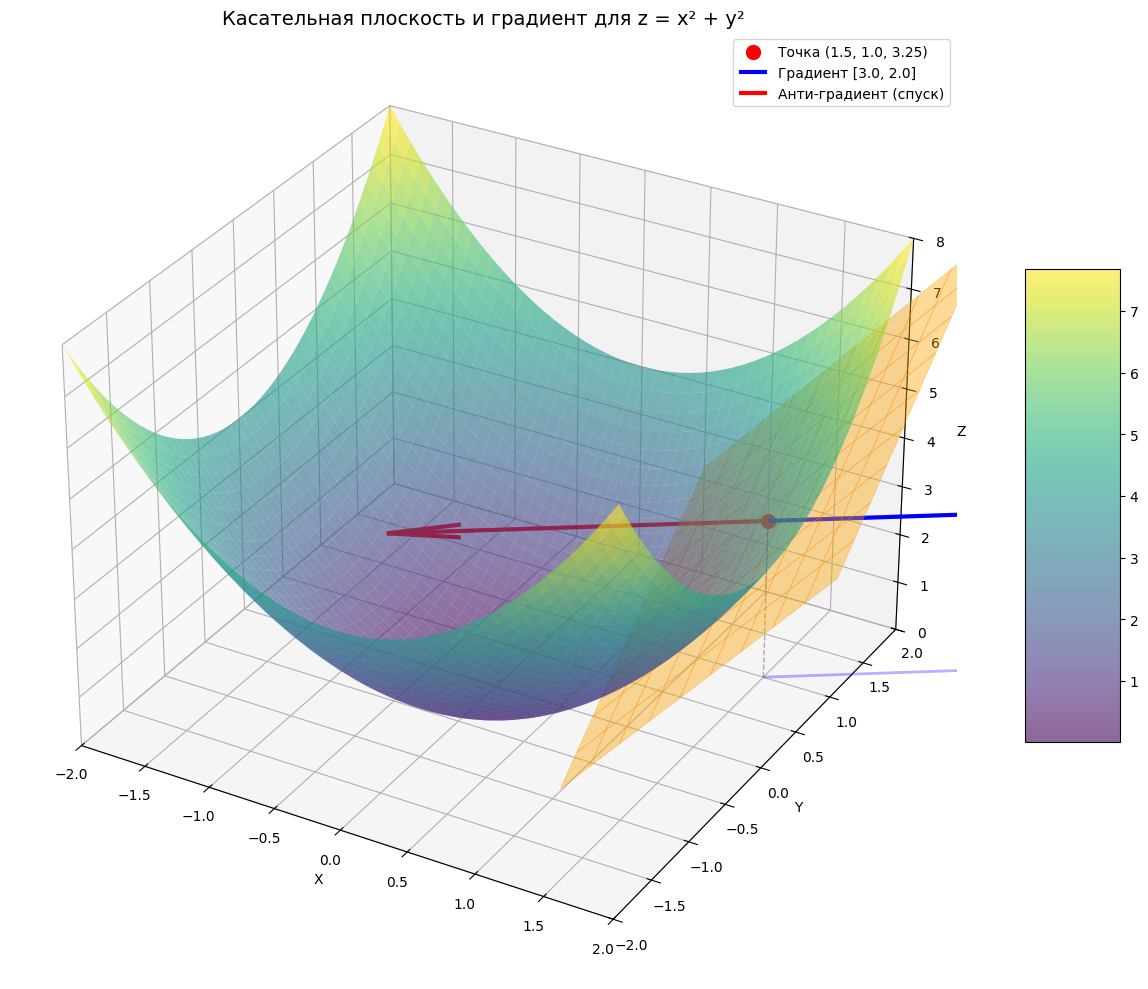

КАСАТЕЛЬНАЯ ПЛОСКОСТЬ И ГРАДИЕНТ
Функция: z = x² + y²
Точка: (1.5, 1.0, 3.25)
Градиент: [3.0, 2.0]

📌 Касательная плоскость: z = 3.2 + 3.0·(x-1.5) + 2.0·(y-1.0)

📐 Градиент - это вектор в касательной плоскости,
   указывающий направление наискорейшего подъёма
   и перпендикулярный линиям уровня!


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция
def f(x, y):
    return x**2 + y**2

# Частные производные (градиент)
def dfx(x, y):
    return 2*x

def dfy(x, y):
    return 2*y

# Точка, в которой смотрим градиент
x0, y0 = 1.5, 1.0
z0 = f(x0, y0)

# Градиент в точке
grad_x = dfx(x0, y0)
grad_y = dfy(x0, y0)

# Создаём сетку для поверхности
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Создаём сетку для касательной плоскости
x_plane = np.linspace(x0 - 1, x0 + 1, 10)
y_plane = np.linspace(y0 - 1, y0 + 1, 10)
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
# Уравнение касательной плоскости: z = f(x0,y0) + fx*(x-x0) + fy*(y-y0)
Z_plane = z0 + grad_x * (X_plane - x0) + grad_y * (Y_plane - y0)

# Создаём фигуру
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Рисуем касательную плоскость (полупрозрачная)
ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.4, color='orange', edgecolor='darkorange', linewidth=0.5)

# Рисуем точку
ax.scatter([x0], [y0], [z0], color='red', s=100, label=f'Точка ({x0}, {y0}, {z0})')

# Рисуем градиент как вектор В КАСАТЕЛЬНОЙ ПЛОСКОСТИ
scale = 0.7
ax.quiver(x0, y0, z0, 
          grad_x * scale, grad_y * scale, 0,
          color='blue', linewidth=3, arrow_length_ratio=0.2,
          label=f'Градиент [{grad_x:.1f}, {grad_y:.1f}]')

# Рисуем анти-градиент
ax.quiver(x0, y0, z0, 
          -grad_x * scale, -grad_y * scale, 0,
          color='red', linewidth=3, arrow_length_ratio=0.2,
          label='Анти-градиент (спуск)')

# Добавляем проекцию градиента на плоскость xy (чтобы было видно направление)
ax.quiver(x0, y0, 0,
          grad_x * scale, grad_y * scale, 0,
          color='blue', alpha=0.3, linewidth=2, arrow_length_ratio=0.2)

# Вертикальная линия от точки до проекции
ax.plot([x0, x0], [y0, y0], [0, z0], 'k--', alpha=0.3, linewidth=1)

# Настройки
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
ax.set_title(f'Касательная плоскость и градиент для z = x² + y²', fontsize=14)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 8])

ax.legend()
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

print("="*70)
print("КАСАТЕЛЬНАЯ ПЛОСКОСТЬ И ГРАДИЕНТ")
print("="*70)
print(f"Функция: z = x² + y²")
print(f"Точка: ({x0}, {y0}, {z0})")
print(f"Градиент: [{grad_x:.1f}, {grad_y:.1f}]")
print(f"\n📌 Касательная плоскость: z = {z0:.1f} + {grad_x:.1f}·(x-{x0}) + {grad_y:.1f}·(y-{y0})")
print(f"\n📐 Градиент - это вектор в касательной плоскости,")
print(f"   указывающий направление наискорейшего подъёма")
print(f"   и перпендикулярный линиям уровня!")
print("="*70)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


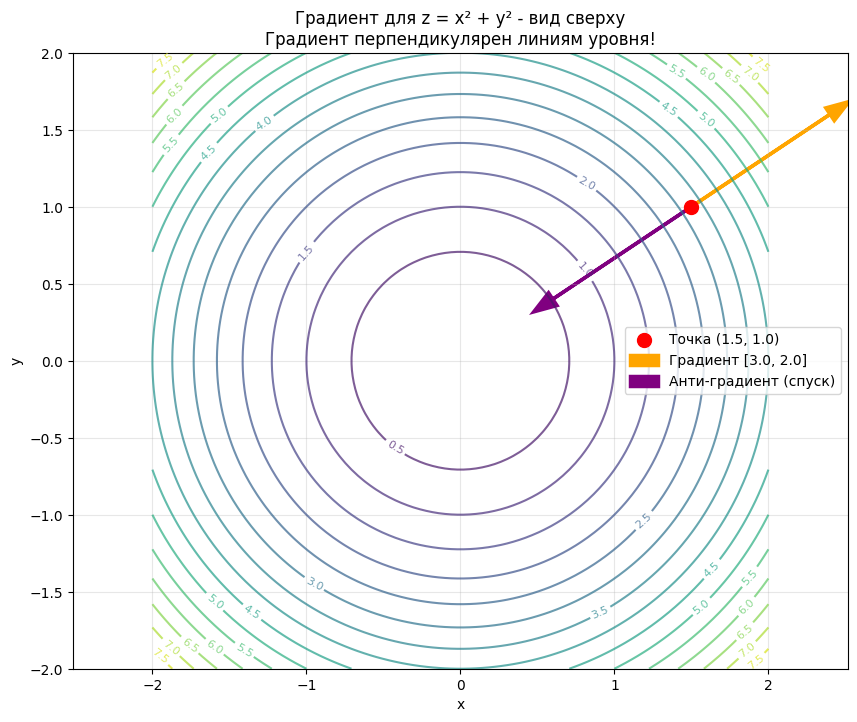

КЛЮЧЕВОЕ СВОЙСТВО:
Градиент ВСЕГДА перпендикулярен линиям уровня!
Показывает направление наискорейшего подъёма


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Функция и градиент
def f(x, y):
    return x**2 + y**2

def dfx(x, y):
    return 2*x

def dfy(x, y):
    return 2*y

# Точка
x0, y0 = 1.5, 1.0
z0 = f(x0, y0)
grad_x = dfx(x0, y0)
grad_y = dfy(x0, y0)

# Сетка для контуров
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))

# Контуры уровня (линии постоянной высоты)
contour = plt.contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# Точка
plt.scatter([x0], [y0], color='red', s=100, zorder=5, label=f'Точка ({x0}, {y0})')

# Градиент - перпендикулярен контурам!
plt.arrow(x0, y0, grad_x * 0.3, grad_y * 0.3, 
         head_width=0.1, head_length=0.15, fc='orange', ec='orange',
         linewidth=2.5, label=f'Градиент [{grad_x:.1f}, {grad_y:.1f}]')

# Анти-градиент
plt.arrow(x0, y0, -grad_x * 0.3, -grad_y * 0.3,
         head_width=0.1, head_length=0.15, fc='purple', ec='purple',
         linewidth=2.5, label='Анти-градиент (спуск)')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Градиент для z = x² + y² - вид сверху\nГрадиент перпендикулярен линиям уровня!')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()

print("="*60)
print("КЛЮЧЕВОЕ СВОЙСТВО:")
print("Градиент ВСЕГДА перпендикулярен линиям уровня!")
print("Показывает направление наискорейшего подъёма")
print("="*60)